# Demo for using pydmp for data fetching and analysis

<h4 style="color:orange;">Pydmp is a python wrapper of the DMP APIs, providing support for reading data in various ways.</h4>

To do:
- Everything should be a function
- There should be a data preprocessing pipeline
- to remove outliers about 2.5
- Also some missing latitude and longitude really

<h2 style="color:#0074D9;">1. List available datasets.</h2>

In [72]:
from pydmp import state
state()

Connected to 1 studies:
Connected to 1 studies:
You have access to 1 studies:
0b53d635-e3eb-4054-855e-485c5268b7c6 = AI-RESPIRE


<h4 style="color:orange;">Pydmp for now supports two granularities to read the data:</h4>
<h4 style="color:orange;">&nbsp;&nbsp;&nbsp;&nbsp;a. Reading a whole file each time.</h4>
<h4 style="color:orange;">&nbsp;&nbsp;&nbsp;&nbsp;b. Reading individual data clips (a value of a cell in the csv or xlsx sheet).</h4>
<h4 style="color:orange;">Other granularities can be further developed depending on real user cases.</h4>


<h2 style="color:#0074D9;">2. List available files of a study.</h2>

In [73]:
from pydmp import list_files
study_id = '0b53d635-e3eb-4054-855e-485c5268b7c6'
files = list_files(study_id=study_id, format='df') # list
files

file_id  \
0   4f3dceec-67a2-44a4-acab-cf7361b7ce83   
1   483666e3-3208-4845-a984-bef044d57d8d   
2   0e141dd0-e7b8-4b28-a669-953f7540738b   
3   8deaf6b2-3bb8-46f7-80e8-1ec4250e618b   
4   edd5a16d-f1b9-4766-b3b6-dfd9e4d01702   
5   aa994b44-8ebb-45eb-807e-cbeff23aa328   
6   0f4ec407-f391-4808-84e4-1cef92892263   
7   caf12f6b-7fbe-4fe3-ae13-23ff92518e2b   
8   1781ed53-b2ae-48ff-b1b8-4db4923a4bc7   
9   c27b322a-f5c3-4c4b-8bcd-3412c88a4020   
10  43bfa380-4233-4f78-ae5d-2799c97285b5   
11  d0408bcd-5279-4502-b1cb-bf1863c9598c   
12  9698eb7f-2aaf-46e3-8e26-082627d6182d   
13  0845ea5b-23f1-4836-a121-97d786ccc65c   
14  22b81b8b-8405-46fa-9e4e-b6d59a38af59   

                                study_id  \
0   0b53d635-e3eb-4054-855e-485c5268b7c6   
1   0b53d635-e3eb-4054-855e-485c5268b7c6   
2   0b53d635-e3eb-4054-855e-485c5268b7c6   
3   0b53d635-e3eb-4054-855e-485c5268b7c6   
4   0b53d635-e3eb-4054-855e-485c5268b7c6   
5   0b53d635-e3eb-4054-855e-485c5268b7c6   
6   0b53d635-e3eb-4054-855e-485c5268b7c6   
7   0b53d635-e3eb-4054-855e-485c5268b7c6   
8   0b53d635-e3eb-4054-855e-485c5268b7c6   
9   0b53d635-e3eb-4054-855e-485c5268b7c6   
10  0b53d635-e3eb-4054-855e-485c5268b7c6   
11  0b53d635-e3eb-4054-855e-485c5268b7c6   
12  0b53d635-e3eb-4054-855e-485c5268b7c6   
13  0b53d635-e3eb-4054-855e-485c5268b7c6   
14  0b53d635-e3eb-4054-855e-485c5268b7c6   

                                      file_name  file_size  \
0                   AI Respire Peakflow df.xlsx      18081   
1                         airspeck_test_df.xlsx   38876572   
2                     filtered_airspeck_df.xlsx   68161645   
3                      filtered_respeck_df.xlsx     574335   
4                 Inhale outcomes Filtered.xlsx      10848   
5                            resp_min_test.xlsx   11921068   
6                           resp_min_train.xlsx   21125628   
7                        test_respeck_hrly.xlsx     268170   
8             Clinical Outcomes dictionary.xlsx      10419   
9                        clinical_outcomes.xlsx      64954   
10                        inh_demographics.xlsx      51051   
11                      inhale_data_upload.xlsx      73983   
12  inhale_demographics_column_description.xlsx      11986   
13                                  pm_data.csv  115145260   
14                                resp_data.csv  179189958   

        file_created_at  
0   2025-06-02 20:42:21  
1   2025-06-02 20:42:40  
2   2025-06-02 20:42:57  
3   2025-06-02 20:43:03  
4   2025-06-02 20:43:09  
5   2025-06-02 20:43:17  
6   2025-06-02 20:43:26  
7   2025-06-02 20:43:33  
8   2025-06-27 16:41:10  
9   2025-06-27 16:41:39  
10  2025-06-27 16:41:46  
11  2025-06-27 16:41:52  
12  2025-06-27 16:41:57  
13  2025-06-27 16:43:09  
14  2025-06-27 16:44:51

<h2 style="color:#0074D9;">3. Fetch the content of a file (csv, xlsx).</h2>

In [74]:
from pydmp import read_file
content = read_file(file=files.iloc[0])
content.head(2)

Unnamed: 0 subject  season  peak_pred  day peak_am peak_pm
0         756  INH101  Winter        553    1                
1         757  INH101  Summer        553    1

In [75]:
import pandas as pd
respiratory_data = read_file(file=files.iloc[14])
pollution_data = read_file(file=files.iloc[13])
respiratory_data

Unnamed: 0 patient_id  age     sex            timestamp  season  \
0                 0     INH001   65  Female  2021-02-23 00:00:00  Winter   
1                 1     INH001   65  Female  2021-02-23 00:01:00  Winter   
2                 2     INH001   65  Female  2021-02-23 00:02:00  Winter   
3                 3     INH001   65  Female  2021-02-23 00:03:00  Winter   
4                 4     INH001   65  Female  2021-02-23 00:04:00  Winter   
...             ...        ...  ...     ...                  ...     ...   
1484148     1484148     INH139   47  Female  2023-10-10 23:56:00  Summer   
1484149     1484149     INH139   47  Female  2023-10-10 23:57:00  Summer   
1484150     1484150     INH139   47  Female  2023-10-10 23:58:00  Summer   
1484151     1484151     INH139   47  Female  2023-10-10 23:59:00  Summer   
1484152     1484152     INH139   47  Female  2023-10-11 00:00:00  Summer   

            br_avg    br_std  act_level  step_count             activity  
0              NaN       NaN   0.006813           0   Lying down on back  
1              NaN       NaN   0.006693           0   Lying down on back  
2              NaN       NaN   0.006611           0   Lying down on back  
3              NaN       NaN   0.007045           0   Lying down on back  
4              NaN       NaN   0.006771           0   Lying down on back  
...            ...       ...        ...         ...                  ...  
1484148  15.966440  2.462694   0.006281           0  Lying down on front  
1484149  15.429062  1.772801   0.009020           0  Lying down on front  
1484150  15.446239  1.067086   0.006772           0  Lying down on front  
1484151  16.658262  1.610748   0.006379           0  Lying down on front  
1484152  17.498243  2.842073   0.006578           0  Lying down on front  

[1484153 rows x 11 columns]

# DATASETS PIPELINE CLEANING

In [76]:
import pandas as pd
# Ensure timestamp is datetime
respiratory_data['timestamp'] = pd.to_datetime(respiratory_data['timestamp'])
pollution_data['timestamp'] = pd.to_datetime(pollution_data['timestamp'])

# Check for duplicate keys
dupes = respiratory_data[respiratory_data.duplicated(subset=['timestamp', 'patient_id'], keep=False)]
dupes.sort_values(['patient_id', 'timestamp'])

dupes
## The below are the duplicated data!!!!

Unnamed: 0 patient_id  age     sex           timestamp  season  \
135576       135576     INH005   24  Female 2021-09-08 10:19:00  Summer   
135577       135577     INH005   24  Female 2021-09-08 10:19:00  Summer   
135578       135578     INH005   24  Female 2021-09-08 10:20:00  Summer   
135579       135579     INH005   24  Female 2021-09-08 10:20:00  Summer   
362260       362260     INH016   36    Male 2022-07-22 10:47:00  Winter   
...             ...        ...  ...     ...                 ...     ...   
1101584     1101584     INH120   32  Female 2022-10-30 01:55:00  Winter   
1101585     1101585     INH120   32  Female 2022-10-30 01:56:00  Winter   
1101586     1101586     INH120   32  Female 2022-10-30 01:57:00  Winter   
1101587     1101587     INH120   32  Female 2022-10-30 01:58:00  Winter   
1101588     1101588     INH120   32  Female 2022-10-30 01:59:00  Winter   

            br_avg    br_std  act_level  step_count                   activity  
135576         NaN       NaN        NaN           0  Sitting straight/Standing  
135577         NaN       NaN   0.574964          99                    Walking  
135578         NaN       NaN        NaN           0         Lying down on back  
135579         NaN       NaN   0.446295          89                    Walking  
362260         NaN       NaN        NaN           0  Sitting straight/Standing  
...            ...       ...        ...         ...                        ...  
1101584  16.495375  0.974599   0.007433           0         Lying down on back  
1101585  16.194965  1.376960   0.007354           0         Lying down on back  
1101586  16.170277  1.288225   0.007850           0         Lying down on back  
1101587  16.185457  2.288017   0.008530           0         Lying down on back  
1101588  16.795544  1.365096   0.007361           0         Lying down on back  

[27870 rows x 11 columns]

In [77]:
## let's drop duplicates for now
respiratory_data_dropping_duplicates = respiratory_data.drop_duplicates()
respiratory_data_nd = respiratory_data_dropping_duplicates.drop(columns=["Unnamed: 0"])
pollution_data_dropping_duplicates = pollution_data.drop_duplicates() 
pollution_data_nd = pollution_data_dropping_duplicates.drop(columns=["Unnamed: 0"])
respiratory_data_nd

patient_id  age     sex           timestamp  season     br_avg  \
0           INH001   65  Female 2021-02-23 00:00:00  Winter        NaN   
1           INH001   65  Female 2021-02-23 00:01:00  Winter        NaN   
2           INH001   65  Female 2021-02-23 00:02:00  Winter        NaN   
3           INH001   65  Female 2021-02-23 00:03:00  Winter        NaN   
4           INH001   65  Female 2021-02-23 00:04:00  Winter        NaN   
...            ...  ...     ...                 ...     ...        ...   
1484148     INH139   47  Female 2023-10-10 23:56:00  Summer  15.966440   
1484149     INH139   47  Female 2023-10-10 23:57:00  Summer  15.429062   
1484150     INH139   47  Female 2023-10-10 23:58:00  Summer  15.446239   
1484151     INH139   47  Female 2023-10-10 23:59:00  Summer  16.658262   
1484152     INH139   47  Female 2023-10-11 00:00:00  Summer  17.498243   

           br_std  act_level  step_count             activity  
0             NaN   0.006813           0   Lying down on back  
1             NaN   0.006693           0   Lying down on back  
2             NaN   0.006611           0   Lying down on back  
3             NaN   0.007045           0   Lying down on back  
4             NaN   0.006771           0   Lying down on back  
...           ...        ...         ...                  ...  
1484148  2.462694   0.006281           0  Lying down on front  
1484149  1.772801   0.009020           0  Lying down on front  
1484150  1.067086   0.006772           0  Lying down on front  
1484151  1.610748   0.006379           0  Lying down on front  
1484152  2.842073   0.006578           0  Lying down on front  

[1484153 rows x 10 columns]

In [78]:
## Check how many NaNs per patient_id
# Percentage of NaNs per column, grouped by patient_id
nan_percent_per_column_per_patient = (
    respiratory_data_nd
    .groupby('patient_id')
    .apply(lambda df: df.isna().sum() / len(df) * 100)
)
# round for readability
nan_percent_per_column_per_patient = nan_percent_per_column_per_patient.round(2)

sorted = nan_percent_per_column_per_patient.sort_values("br_avg")
sorted

patient_id  age  sex  timestamp  season  br_avg  br_std  \
patient_id                                                            
INH100             0.0  0.0  0.0        0.0     0.0   12.57   12.57   
INH120             0.0  0.0  0.0        0.0     0.0   13.75   13.75   
INH101             0.0  0.0  0.0        0.0     0.0   13.97   13.97   
INH112             0.0  0.0  0.0        0.0     0.0   15.03   15.03   
INH108             0.0  0.0  0.0        0.0     0.0   15.80   15.80   
INH128             0.0  0.0  0.0        0.0     0.0   16.49   16.49   
INH013             0.0  0.0  0.0        0.0     0.0   16.87   16.87   
INH007             0.0  0.0  0.0        0.0     0.0   17.12   17.12   
INH024             0.0  0.0  0.0        0.0     0.0   17.23   17.23   
INH012             0.0  0.0  0.0        0.0     0.0   17.27   17.27   
INH017             0.0  0.0  0.0        0.0     0.0   17.75   17.75   
INH106             0.0  0.0  0.0        0.0     0.0   18.50   18.50   
INH015             0.0  0.0  0.0        0.0     0.0   20.05   20.05   
INH113             0.0  0.0  0.0        0.0     0.0   20.22   20.22   
INH102             0.0  0.0  0.0        0.0     0.0   20.34   20.34   
INH014             0.0  0.0  0.0        0.0     0.0   20.65   20.65   
INH103             0.0  0.0  0.0        0.0     0.0   20.70   20.70   
INH119             0.0  0.0  0.0        0.0     0.0   21.31   21.31   
INH114             0.0  0.0  0.0        0.0     0.0   21.41   21.41   
INH115             0.0  0.0  0.0        0.0     0.0   21.59   21.59   
INH123             0.0  0.0  0.0        0.0     0.0   21.73   21.73   
INH111             0.0  0.0  0.0        0.0     0.0   22.02   22.02   
INH003             0.0  0.0  0.0        0.0     0.0   22.09   22.09   
INH025             0.0  0.0  0.0        0.0     0.0   22.57   22.57   
INH138             0.0  0.0  0.0        0.0     0.0   22.64   22.64   
INH127             0.0  0.0  0.0        0.0     0.0   22.91   22.91   
INH027             0.0  0.0  0.0        0.0     0.0   23.61   23.61   
INH135             0.0  0.0  0.0        0.0     0.0   23.68   23.68   
INH107             0.0  0.0  0.0        0.0     0.0   23.88   23.88   
INH139             0.0  0.0  0.0        0.0     0.0   24.15   24.15   
INH121             0.0  0.0  0.0        0.0     0.0   24.16   24.16   
INH131             0.0  0.0  0.0        0.0     0.0   26.09   26.09   
INH023             0.0  0.0  0.0        0.0     0.0   26.55   26.55   
INH109             0.0  0.0  0.0        0.0     0.0   26.55   26.55   
INH006             0.0  0.0  0.0        0.0     0.0   26.60   26.60   
INH029             0.0  0.0  0.0        0.0     0.0   27.09   27.09   
INH110             0.0  0.0  0.0        0.0     0.0   27.62   27.62   
INH117             0.0  0.0  0.0        0.0     0.0   28.63   28.63   
INH004             0.0  0.0  0.0        0.0     0.0   28.80   28.80   
INH028             0.0  0.0  0.0        0.0     0.0   29.32   29.32   
INH010             0.0  0.0  0.0        0.0     0.0   29.33   29.33   
INH002             0.0  0.0  0.0        0.0     0.0   29.61   29.61   
INH018             0.0  0.0  0.0        0.0     0.0   29.66   29.66   
INH001             0.0  0.0  0.0        0.0     0.0   30.03   30.03   
INH011             0.0  0.0  0.0        0.0     0.0   30.80   30.80   
INH130             0.0  0.0  0.0        0.0     0.0   32.82   32.82   
INH020             0.0  0.0  0.0        0.0     0.0   34.09   34.09   
INH008             0.0  0.0  0.0        0.0     0.0   34.30   34.30   
INH129             0.0  0.0  0.0        0.0     0.0   34.51   34.51   
INH124             0.0  0.0  0.0        0.0     0.0   34.62   34.62   
INH005             0.0  0.0  0.0        0.0     0.0   35.29   35.29   
INH126             0.0  0.0  0.0        0.0     0.0   36.03   36.03   
INH019             0.0  0.0  0.0        0.0     0.0   38.41   38.41   
INH026             0.0  0.0  0.0        0.0     0.0   42.16   42.16   
INH132             0.0  0.0  0.0    

In [79]:
# Group by patient, compute std only on numeric columns
flatness_check = (
    respiratory_data_nd
    .groupby('patient_id')
    .agg({ 
        'br_avg': 'std', 
        'br_std': 'std', 
        'act_level': 'std', 
        'step_count': 'std'
    })
)

print(flatness_check)


              br_avg    br_std  act_level  step_count
patient_id                                           
INH001      2.924818  2.158776   0.154326   24.816160
INH002      2.884499  2.000652   0.342065   32.404539
INH003      3.030348  2.104858   0.115850   18.985207
INH004      3.360571  2.381696   0.323224   37.131406
INH005      3.476879  2.557521   0.167042   28.564558
INH006      3.172247  2.179166   0.112164   23.182031
INH007      2.909987  2.258878   0.115795   22.320671
INH008      2.565912  1.984009   0.177807   26.626348
INH010      2.833387  2.168732   0.189422   32.323766
INH011      2.874930  2.196044   0.202340   28.787657
INH012      2.566378  1.748702   0.103469   18.499869
INH013      2.795707  2.255686   0.162214   30.629165
INH014      3.034972  2.445570   0.157104   26.456330
INH015      2.757107  2.220212   0.187085   24.019889
INH016      3.073875  2.025137   0.218660   32.943359
INH017      2.746359  2.161436   0.129054   26.959963
INH018      2.775107  1.9750

In [80]:
## Check how many NaNs per patient_id
# Percentage of NaNs per column, grouped by patient_id
nan_percent_per_column_pollution = (
    pollution_data_nd
    .groupby('patient_id')
    .apply(lambda df: df.isna().sum() / len(df) * 100)
)

nan_percent_per_column_pollution

## No pollution columns need to be dropped!

patient_id   latitude  longitude  timestamp  season  pm2_5  \
patient_id                                                               
INH001             0.0   3.764418   3.764418        0.0     0.0    0.0   
INH002             0.0   0.784645   0.784645        0.0     0.0    0.0   
INH003             0.0   2.674917   2.674917        0.0     0.0    0.0   
INH004             0.0   1.064090   1.064090        0.0     0.0    0.0   
INH005             0.0   9.954441   9.954441        0.0     0.0    0.0   
INH006             0.0   3.414167   3.414167        0.0     0.0    0.0   
INH007             0.0   1.008208   1.008208        0.0     0.0    0.0   
INH008             0.0  66.990035  66.990035        0.0     0.0    0.0   
INH010             0.0   7.125346   7.125346        0.0     0.0    0.0   
INH011             0.0   7.275360   7.275360        0.0     0.0    0.0   
INH012             0.0  25.218784  25.218784        0.0     0.0    0.0   
INH013             0.0  25.833072  25.833072        0.0     0.0    0.0   
INH014             0.0   0.260213   0.260213        0.0     0.0    0.0   
INH015             0.0  29.126669  29.126669        0.0     0.0    0.0   
INH016             0.0   3.167317   3.167317        0.0     0.0    0.0   
INH017             0.0  21.642568  21.642568        0.0     0.0    0.0   
INH018             0.0  51.257584  51.257584        0.0     0.0    0.0   
INH019             0.0  50.368426  50.368426        0.0     0.0    0.0   
INH020             0.0  13.693346  13.693346        0.0     0.0    0.0   
INH023             0.0  39.841090  39.841090        0.0     0.0    0.0   
INH024             0.0  12.697690  12.697690        0.0     0.0    0.0   
INH025             0.0  11.741867  11.741867        0.0     0.0    0.0   
INH026             0.0  10.752505  10.752505        0.0     0.0    0.0   
INH027             0.0  50.420934  50.420934        0.0     0.0    0.0   
INH028             0.0  44.538974  44.538974        0.0     0.0    0.0   
INH100             0.0   1.343647   1.343647        0.0     0.0    0.0   
INH101             0.0   1.113548   1.113548        0.0     0.0    0.0   
INH102             0.0   0.165222   0.165222        0.0     0.0    0.0   
INH103             0.0   3.449541   3.449541        0.0     0.0    0.0   
INH106             0.0   0.610434   0.610434        0.0     0.0    0.0   
INH107             0.0   4.906781   4.906781        0.0     0.0    0.0   
INH108             0.0   0.697145   0.697145        0.0     0.0    0.0   
INH109             0.0   0.658230   0.658230        0.0     0.0    0.0   
INH110             0.0   0.819014   0.819014        0.0     0.0    0.0   
INH111             0.0   2.930151   2.930151        0.0     0.0    0.0   
INH112             0.0   0.916564   0.916564        0.0     0.0    0.0   
INH113             0.0   0.329489   0.329489        0.0     0.0    0.0   
INH114             0.0   3.264459   3.264459        0.0     0.0    0.0   
INH115             0.0  26.818392  26.818392        0.0     0.0    0.0   
INH117             0.0   0.924467   0.924467        0.0     0.0    0.0   
INH119             0.0   2.341920   2.341920        0.0     0.0    0.0   
INH120             0.0  12.454037  12.454037        0.0     0.0    0.0   
INH121             0.0  42.203346  42.203346        0.0     0.0    0.0   
INH123             0.0   4.870527   4.870527        0.0     0.0    0.0   
INH124             0.0   7.482508   7.482508        0.0     0.0    0.0   
INH126             0.0  33.270920  33.270920        0.0     0.0    0.0   
INH127             0.0  36.107996  36.107996        0.0     0.0    0.0   
INH128             0.0  17.279973  17.279973        0.0     0.0    0.0   
INH129             0.0   4.919820   4.919820        0.0     0.0    0.0   
INH130             0.0  66.906282  66.906282        0.0     0.0    0.0   
INH131             0.0  24.022594  24.022594        0.0     0.0    0.0   
INH132             0.0  57.415071  57.415071        0.0     0.0    0.0   
INH135          

In [81]:
## For now I am gonna go safe and drop duplicates as well as dropna and then I can discuss:
patient_exlcuded = ["INH016", "INH019","INH026", "INH126", "INH136"]	
resp_data_clean = respiratory_data_nd[~respiratory_data_nd["patient_id"].isin(patient_exlcuded)]
resp_data_clean

patient_id  age     sex           timestamp  season     br_avg  \
0           INH001   65  Female 2021-02-23 00:00:00  Winter        NaN   
1           INH001   65  Female 2021-02-23 00:01:00  Winter        NaN   
2           INH001   65  Female 2021-02-23 00:02:00  Winter        NaN   
3           INH001   65  Female 2021-02-23 00:03:00  Winter        NaN   
4           INH001   65  Female 2021-02-23 00:04:00  Winter        NaN   
...            ...  ...     ...                 ...     ...        ...   
1484148     INH139   47  Female 2023-10-10 23:56:00  Summer  15.966440   
1484149     INH139   47  Female 2023-10-10 23:57:00  Summer  15.429062   
1484150     INH139   47  Female 2023-10-10 23:58:00  Summer  15.446239   
1484151     INH139   47  Female 2023-10-10 23:59:00  Summer  16.658262   
1484152     INH139   47  Female 2023-10-11 00:00:00  Summer  17.498243   

           br_std  act_level  step_count             activity  
0             NaN   0.006813           0   Lying down on back  
1             NaN   0.006693           0   Lying down on back  
2             NaN   0.006611           0   Lying down on back  
3             NaN   0.007045           0   Lying down on back  
4             NaN   0.006771           0   Lying down on back  
...           ...        ...         ...                  ...  
1484148  2.462694   0.006281           0  Lying down on front  
1484149  1.772801   0.009020           0  Lying down on front  
1484150  1.067086   0.006772           0  Lying down on front  
1484151  1.610748   0.006379           0  Lying down on front  
1484152  2.842073   0.006578           0  Lying down on front  

[1383970 rows x 10 columns]

In [82]:
## also dropping na for the two datasets:
## Respiratory data:
resp_data_clean_na = resp_data_clean.dropna()

## Pollution data:
pollution_data_clean_na = pollution_data_nd.dropna()


## MERGING DATASETS 

In [83]:
## I am going to merge the datasets based on timestamp and patient_id
## if there is no alignment, for now I will discard the data

# Merge the two tables on both patient_id and timestamp
merged_data = pd.merge(
    resp_data_clean_na,
    pollution_data_clean_na,
    on=['patient_id', 'timestamp'],
    how='inner'  # or 'inner' if you only want matching rows
)

## Let's check which ids are in one but not in the other!

id_resp = resp_data_clean_na["patient_id"].unique()
id_pollution = pollution_data_clean_na["patient_id"].unique()

non_matching_id = []

for i in id_resp:
    if i in id_pollution:
        pass
    else: non_matching_id.append(i)

print(non_matching_id, print(len(resp_data_clean_na)), print(len(pollution_data_clean_na)))

1058553
1228132
['INH029'] None None


In [84]:
len(merged_data["patient_id"].unique())

51

In [85]:
import numpy as np
merged_cyclical = merged_data.copy()
merged_cyclical = merged_cyclical.sort_values(['patient_id', 'timestamp']).reset_index(drop=True)

# ## Now let's pslit by chuncks where data is closed together - in term of time difference

merged_cyclical['time_diff'] = merged_cyclical.groupby('patient_id')['timestamp'].diff() ## Adding difference between that and the previous one 

merged_cyclical['new_segment'] = merged_cyclical['time_diff'] > pd.Timedelta(minutes=1)
merged_cyclical['segment_id'] = merged_cyclical.groupby('patient_id')['new_segment'].cumsum()



# # Count rows per (patient_id, segment_id)
segment_lengths = merged_cyclical.groupby(['patient_id', 'segment_id']).size().reset_index(name='length')

# # Keep only those with enough length
min_points = 30  # e.g. 60 minutes of data
valid_segments = segment_lengths[segment_lengths['length'] >= min_points]

# # Merge back to original df to filter
merged_cyclical = merged_cyclical.merge(valid_segments[['patient_id', 'segment_id']], on=['patient_id', 'segment_id'], how='inner')

merged_cyclical

def apply_cyclical(block):
    # Extract components from timestamp
    block['hour'] = block['timestamp'].dt.hour
    block['dow'] = block['timestamp'].dt.dayofweek           # 0 = Monday, 6 = Sunday
    block['day_of_year'] = block['timestamp'].dt.dayofyear    # 1 to 365

    # Hourly (circadian)
    block['hour_sin'] = np.sin(2 * np.pi * block['hour'] / 24)
    block['hour_cos'] = np.cos(2 * np.pi * block['hour'] / 24)

    # Weekly
    block['dow_sin'] = np.sin(2 * np.pi * block['dow'] / 7)
    block['dow_cos'] = np.cos(2 * np.pi * block['dow'] / 7)

    # Yearly (seasonality)
    block['yearly_sin'] = np.sin(2 * np.pi * block['day_of_year'] / 365)
    block['yearly_cos'] = np.cos(2 * np.pi * block['day_of_year'] / 365)

    return block

merged_continuous_blocks = apply_cyclical(merged_cyclical)

In [115]:
merged_continuous_blocks.columns

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude', 'longitude',
       'season_y', 'pm2_5', 'temperature', 'humidity', 'time_diff',
       'new_segment', 'segment_id', 'hour', 'dow', 'day_of_year', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'yearly_sin', 'yearly_cos',
       'timestamp_hour', 'lat_round', 'lon_round'],
      dtype='object')

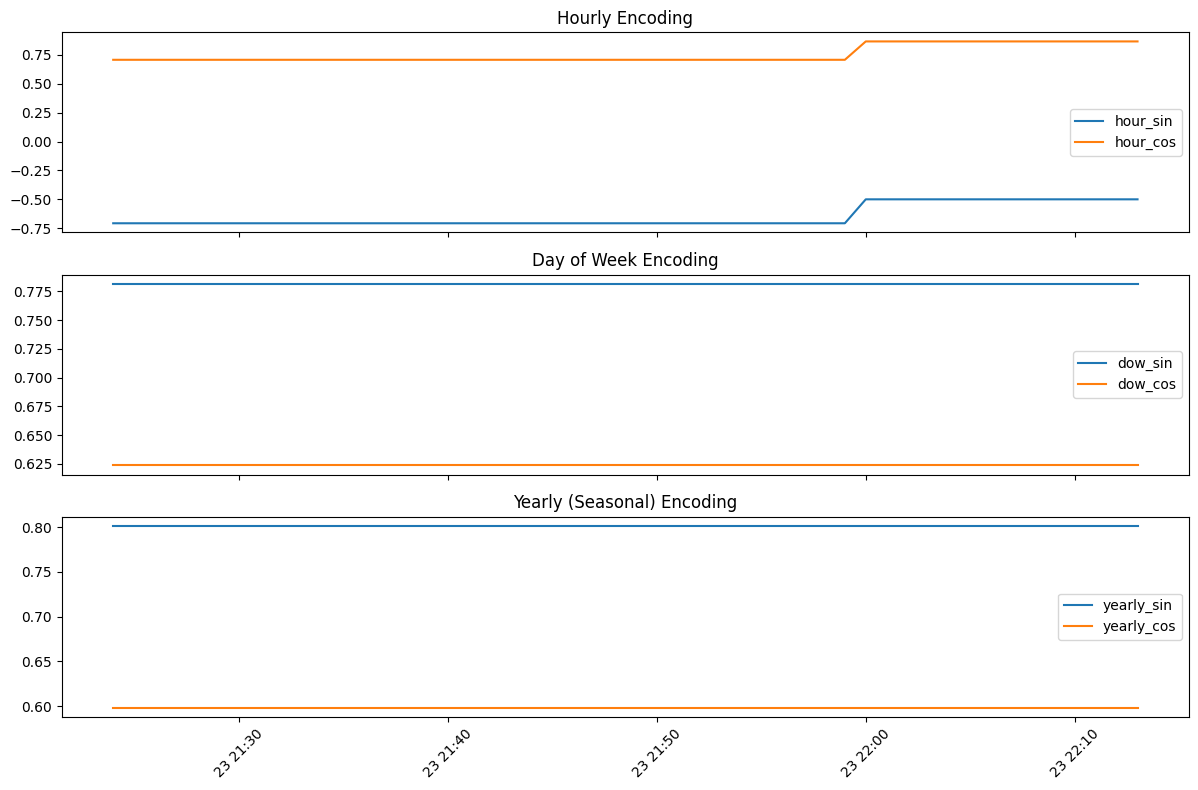

In [87]:
import matplotlib.pyplot as plt

def plot_cyclical_features(df, patient_id, segment_id):
    block = df[(df['patient_id'] == patient_id) & (df['segment_id'] == segment_id)].copy()

    if block.empty:
        print(f"No data found for patient {patient_id}, segment {segment_id}")
        return

    fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    axs[0].plot(block['timestamp'], block['hour_sin'], label='hour_sin')
    axs[0].plot(block['timestamp'], block['hour_cos'], label='hour_cos')
    axs[0].legend()
    axs[0].set_title('Hourly Encoding')

    axs[1].plot(block['timestamp'], block['dow_sin'], label='dow_sin')
    axs[1].plot(block['timestamp'], block['dow_cos'], label='dow_cos')
    axs[1].legend()
    axs[1].set_title('Day of Week Encoding')

    axs[2].plot(block['timestamp'], block['yearly_sin'], label='yearly_sin')
    axs[2].plot(block['timestamp'], block['yearly_cos'], label='yearly_cos')
    axs[2].legend()
    axs[2].set_title('Yearly (Seasonal) Encoding')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
plot_cyclical_features(merged_continuous_blocks, patient_id='INH001', segment_id=100)


In [88]:
valid_counts = merged_continuous_blocks.groupby(['patient_id', 'segment_id']).size()
print(f"Total valid continuous segments: {valid_counts.shape[0]}")


Total valid continuous segments: 7018


## OPENWEATHER API REQUEST

In [89]:
# # ## ----------------------------------------------------------
# # ## Create a list of unique timestamp in hour cause openweather is in hour
# # ## patient_id longitude and latitude per user so that I can download equivalent data from OpenWeather
# # ## this is a massive limitation! Only hourly pollution level is not enough
# # ## ----------------------------------------------------------

# ## 
# # import pandas as pd

# pat_choose = ['INH001', 'INH002', 'INH003', 'INH004', 'INH005', 'INH006']

# merge_data_pat_id = merge_data_selected_columns[merge_data_selected_columns["patient_id"].isin(pat_choose)].copy()

# merge_data_pat_id['timestamp_hour'] = pd.to_datetime(merge_data_pat_id['timestamp']).dt.floor('H')

# merge_data_pat_id
# # # # # # # 3. Select only the relevant columns for API querying
# weather_query_cols = ['timestamp_hour', 'latitude', 'longitude']

# # # merge_data_pat_id
# # # # # # # 4. Drop duplicates to minimize API requests
# unique_weather_queries = merge_data_pat_id[weather_query_cols].drop_duplicates()

# # # # # # # 6. Preview
# print(unique_weather_queries)

# # unique_weather_queries.to_csv("request135_139.csv")

## NOW ADDING OPENWEATHER DATA AND MERGING ALTOGETHER

In [90]:
# ----------------------------------------------------------------- 
# Step 1: Import and Concatenate OpenWeather Files
# ----------------------------------------------------------------- 

pollution_results_incremental001_006 = pd.read_csv("pollution_results_incremental001_006.csv")
pollution_results_incremental007_013 = pd.read_csv("pollution_results_incremental007_013.csv")
pollution_results_incremental014_023 = pd.read_csv("pollution_results_incremental014_023.csv") 
pollution_results_incremental024_101 = pd.read_csv("pollution_results_incremental024_101.csv")
pollution_results_incremental102_109 = pd.read_csv("pollution_results_incremental102_109.csv")
pollution_results_incremental110_115 = pd.read_csv("pollution_results_incremental110_115.csv")
pollution_results_incremental117_124 = pd.read_csv("pollution_results_incremental117_124.csv")
pollution_results_incremental127_132 = pd.read_csv("pollution_results_incremental127_132.csv")
pollution_results_incremental135_139 = pd.read_csv("pollution_results_incremental135_139.csv")

# Add more CSVs here if needed

concat_openweather = pd.concat([
    pollution_results_incremental001_006,
    pollution_results_incremental007_013, 
    pollution_results_incremental014_023,
    pollution_results_incremental024_101,
    pollution_results_incremental102_109,
    pollution_results_incremental110_115,
    pollution_results_incremental117_124,
    pollution_results_incremental127_132,
    pollution_results_incremental135_139
])

# Convert and rename timestamp
concat_openweather["start_time"] = pd.to_datetime(concat_openweather["start_time"], unit='s')
concat_openweather["end_time"] = pd.to_datetime(concat_openweather["end_time"], unit='s')
concat_openweather = concat_openweather.rename(columns={"start_time": "timestamp"})

# FLOOR to hour NOW — this is critical
concat_openweather['timestamp_hour'] = concat_openweather['timestamp'].dt.floor('H')

# Round lat/lon
concat_openweather['lat_round'] = concat_openweather['latitude'].round(3)
concat_openweather['lon_round'] = concat_openweather['longitude'].round(3)

# Aggregate on floored hour and rounded location
concat_openweather_agg = (
    concat_openweather
    .groupby(['timestamp_hour', 'lat_round', 'lon_round'])
    .mean(numeric_only=True)
    .reset_index()
)

concat_openweather

latitude  longitude           timestamp            end_time  AQI  \
0      51.490046  -0.174493 2021-02-23 09:00:00 2021-02-23 10:00:00  1.0   
1      51.490047  -0.174500 2021-02-23 09:00:00 2021-02-23 10:00:00  1.0   
2      51.490049  -0.174472 2021-02-23 09:00:00 2021-02-23 10:00:00  1.0   
3      51.490052  -0.174474 2021-02-23 09:00:00 2021-02-23 10:00:00  1.0   
4      51.490128  -0.174413 2021-02-23 09:00:00 2021-02-23 10:00:00  1.0   
...          ...        ...                 ...                 ...  ...   
47369  51.472433  -0.209053 2023-10-10 23:00:00 2023-10-11 00:00:00  2.0   
47370  51.472422  -0.209052 2023-10-10 23:00:00 2023-10-11 00:00:00  2.0   
47371  51.472418  -0.209052 2023-10-10 23:00:00 2023-10-11 00:00:00  2.0   
47372  51.472421  -0.209044 2023-10-10 23:00:00 2023-10-11 00:00:00  2.0   
47373  51.472433  -0.209029 2023-10-10 23:00:00 2023-10-11 00:00:00  2.0   

       pm2_5   pm10    no    no2     o3   so2      co      timestamp_hour  \
0       1.72   2.34  0.67  12.85  72.24  4.77  230.31 2021-02-23 09:00:00   
1       1.72   2.34  0.67  12.85  72.24  4.77  230.31 2021-02-23 09:00:00   
2       1.72   2.34  0.67  12.85  72.24  4.77  230.31 2021-02-23 09:00:00   
3       1.72   2.34  0.67  12.85  72.24  4.77  230.31 2021-02-23 09:00:00   
4       1.72   2.34  0.67  12.85  72.24  4.77  230.31 2021-02-23 09:00:00   
...      ...    ...   ...    ...    ...   ...     ...                 ...   
47369  10.33  18.25  0.00  11.82  68.66  5.07  206.95 2023-10-10 23:00:00   
47370  10.33  18.25  0.00  11.82  68.66  5.07  206.95 2023-10-10 23:00:00   
47371  10.33  18.25  0.00  11.82  68.66  5.07  206.95 2023-10-10 23:00:00   
47372  10.33  18.25  0.00  11.82  68.66  5.07  206.95 2023-10-10 23:00:00   
47373  10.33  18.25  0.00  11.82  68.66  5.07  206.95 2023-10-10 23:00:00   

       lat_round  lon_round  
0         51.490     -0.174  
1         51.490     -0.175  
2         51.490     -0.174  
3         51.490     -0.174  
4         51.490     -0.174  
...          ...        ...  
47369     51.472     -0.209  
47370     51.472     -0.209  
47371     51.472     -0.209  
47372     51.472     -0.209  
47373     51.472     -0.209  

[525664 rows x 15 columns]

In [91]:
# ----------------------------------------------------------------- 
# MERGING INHALE WITH OPENWEATHER
# ----------------------------------------------------------------- 

## The problem that I have now is that merge_data_selected_columns is minute level
## while openweather is hourly level
## I will then merge the 2 dataframes on hour for openweather, and hour the minutes belong to 
## for INHALE dataset

print(merged_continuous_blocks["timestamp"].head())  # from pollution data
print(concat_openweather["timestamp"].head())  # from physiological/GPS data 

## Before I merge let's extract the hour
# Floor timestamps to the hour
merged_continuous_blocks['timestamp_hour'] = pd.to_datetime(merged_continuous_blocks['timestamp']).dt.floor('H')

# Prepare INHALE data
merged_continuous_blocks['timestamp_hour'] = pd.to_datetime(merged_continuous_blocks['timestamp']).dt.floor('H')
merged_continuous_blocks['lat_round'] = merged_continuous_blocks['latitude'].round(3)
merged_continuous_blocks['lon_round'] = merged_continuous_blocks['longitude'].round(3)

# Merge
merged_inhale_openweather = pd.merge(
    merged_continuous_blocks,
    concat_openweather_agg,
    on=['timestamp_hour', 'lat_round', 'lon_round'],
    how='inner'
)

diagnostic_merge = pd.merge(
    merged_continuous_blocks,
    concat_openweather_agg,
    on=['timestamp_hour', 'lat_round', 'lon_round'],
    how='outer',
    indicator=True
)
print("Diagnostic merge:", diagnostic_merge['_merge'].value_counts())

# Confirm row reduction
print(f"Merged shape: {merged_inhale_openweather.shape}")
print(f"INHALE base rows: {merged_continuous_blocks.shape}")
print(f"OpenWeather unique hour-loc rows: {concat_openweather_agg.shape}")

0   2021-02-23 21:24:00
1   2021-02-23 21:25:00
2   2021-02-23 21:26:00
3   2021-02-23 21:27:00
4   2021-02-23 21:28:00
Name: timestamp, dtype: datetime64[ns]
0   2021-02-23 09:00:00
1   2021-02-23 09:00:00
2   2021-02-23 09:00:00
3   2021-02-23 09:00:00
4   2021-02-23 09:00:00
Name: timestamp, dtype: datetime64[ns]
Diagnostic merge: _merge
both          533012
right_only     32907
left_only          0
Name: count, dtype: int64
Merged shape: (533012, 40)
INHALE base rows: (533012, 31)
OpenWeather unique hour-loc rows: (54606, 12)


In [92]:
merged_inhale_openweather.columns

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude_x', 'longitude_x',
       'season_y', 'pm2_5_x', 'temperature', 'humidity', 'time_diff',
       'new_segment', 'segment_id', 'hour', 'dow', 'day_of_year', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'yearly_sin', 'yearly_cos',
       'timestamp_hour', 'lat_round', 'lon_round', 'latitude_y', 'longitude_y',
       'pm2_5_y', 'pm10', 'no', 'no2', 'o3', 'so2', 'co'],
      dtype='object')

In [93]:
# ----------------------------------------------------------------- 
# DROPPING NOT NEEDED COLUMNS AND THEN EDA
# ----------------------------------------------------------------- 

## To check:]
## 1: Drop non needed columns 

# 1: I will drop:
# timestamp_y becuase not needed
# 'latitude_y', 'longitude_y' I have it from Inhale
# 'end_time', I already have timestamp

# Check if latitude and longitude from both sources are identical
merged_check = merged_inhale_openweather.copy()
merged_check['lat_diff'] = merged_check['latitude_x'] - merged_check['latitude_y']
merged_check['lon_diff'] = merged_check['longitude_x'] - merged_check['longitude_y']

# Summarize any differences
print(merged_check[['lat_diff', 'lon_diff']].describe())

## As we can see differences are minimals so we can drop lat long y
merged_inhale_openweather_dropped = merged_inhale_openweather.drop(columns= ["latitude_y","longitude_y"])

           lat_diff      lon_diff
count  5.330120e+05  5.330120e+05
mean  -1.949559e-07  4.761220e-07
std    5.192500e-05  7.240830e-05
min   -7.540385e-04 -8.251676e-04
25%   -1.236400e-05 -1.799250e-05
50%    0.000000e+00  0.000000e+00
75%    1.281488e-05  1.808245e-05
max    6.981417e-04  8.693057e-04


## OUTLIERS REMOVAL AND N0RMALISATION

In [94]:
## 1: Outliers?
## 2: Column by column checking
## Normnalisation and log scaling skewed etc

## Dropping not needed
merged_inhale_openweather_dropped.columns

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude_x', 'longitude_x',
       'season_y', 'pm2_5_x', 'temperature', 'humidity', 'time_diff',
       'new_segment', 'segment_id', 'hour', 'dow', 'day_of_year', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'yearly_sin', 'yearly_cos',
       'timestamp_hour', 'lat_round', 'lon_round', 'pm2_5_y', 'pm10', 'no',
       'no2', 'o3', 'so2', 'co'],
      dtype='object')

In [95]:
# ----------------------------------------------------------------- 
# OUTLIERS ANALYSIS AND REMOVAL
# ----------------------------------------------------------------- 

# 1. I am going to describe the dataset first and identify where the outliers are
# 2. I will then plot them with a boxplot

## You can see straight away there are outliers in:
# a. Does a value of 44 makes sense? Could it be that the patient was maybe just doing sport? 
# b. Is an activity level higher than 1 actually possible? I asked hisham!
# c. pm2_5 definitely has an outlier, this is because a max of 2245 would hurt or kill a person instantly.
# d. Same thing with temperature really! I struggle to believe a temperature of 56 degrees. 
## pm2.5x since the mean is 4 but the max is 2245, same with temperature. Also cause pm2.5y which is the same just not as granular is 
## has a max of 50.
## e. I am also curious to focus on pollution measures to see those spikes!
print(merged_inhale_openweather_dropped.describe())

                 age                      timestamp         br_avg  \
count  533012.000000                         533012  533012.000000   
mean       44.286570  2022-04-09 20:10:22.382872832      16.193674   
min        20.000000            2021-02-10 13:14:00       7.198472   
25%        35.000000            2021-09-09 00:12:45      14.352060   
50%        42.000000            2022-02-14 23:13:30      15.931035   
75%        55.000000            2022-11-03 01:45:15      17.765973   
max        70.000000            2024-01-30 23:59:00      40.539921   
std        12.283156                            NaN       2.725490   

              br_std      act_level     step_count     latitude_x  \
count  533012.000000  533012.000000  533012.000000  533012.000000   
mean        2.508384       0.026085       2.506171      51.491539   
min         0.000000       0.004975       0.000000      50.742168   
25%         1.058105       0.008530       0.000000      51.475014   
50%         1.789392    

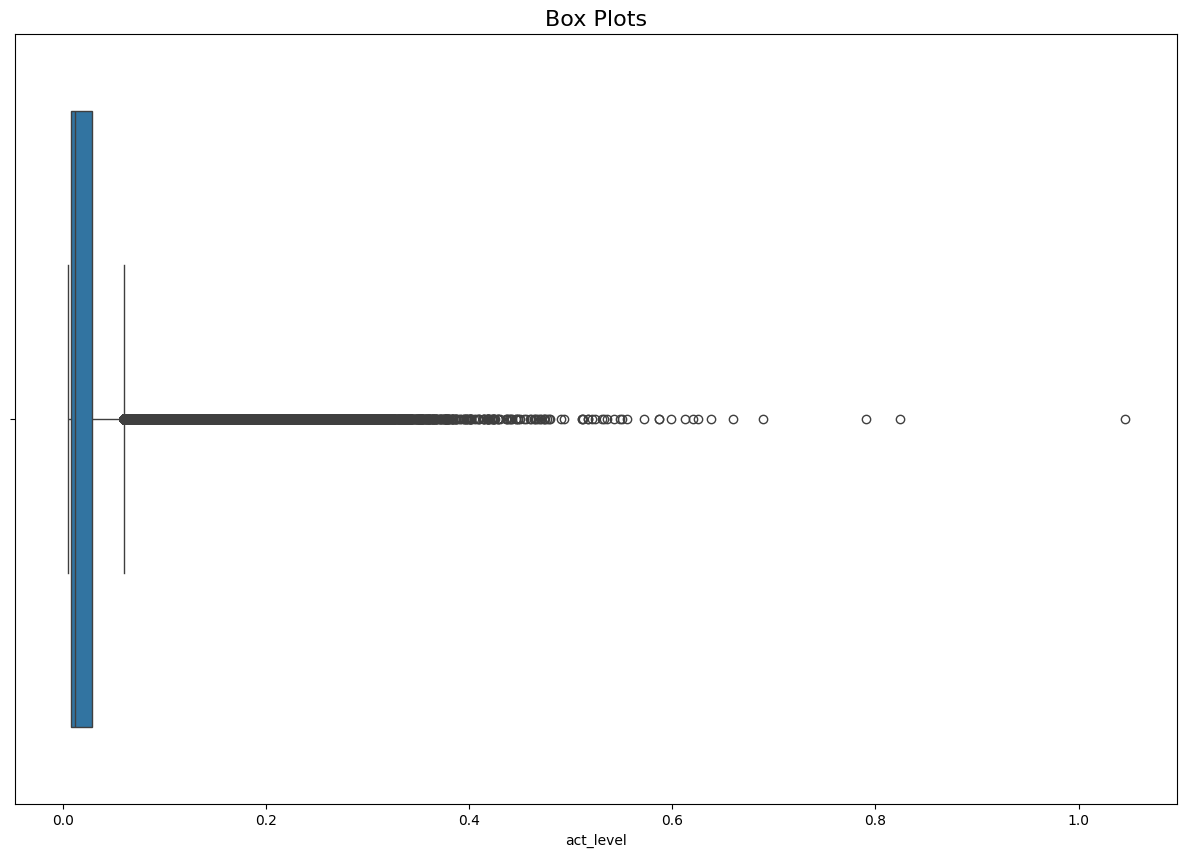

In [96]:
# ----------------------------------------------------------------- 
# FOCUSING ON POINT A. AND B.
# ----------------------------------------------------------------- 

# a. Does a value of 1.75 makes sense? Could it be that the patient was maybe just doing sport?
## Boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
poll_box_activity = merged_inhale_openweather_dropped["act_level"]

plt.figure(figsize=(15, 10))
sns.boxplot(data=poll_box_activity, orient='h')
plt.title('Box Plots', fontsize=16)
plt.show()

## OUTPUT --> Based on the below plot, there are only a few values above 1.25 so I will drop them!
## Possibly an analysis of whether that's real as in if it's a recurring trend or not

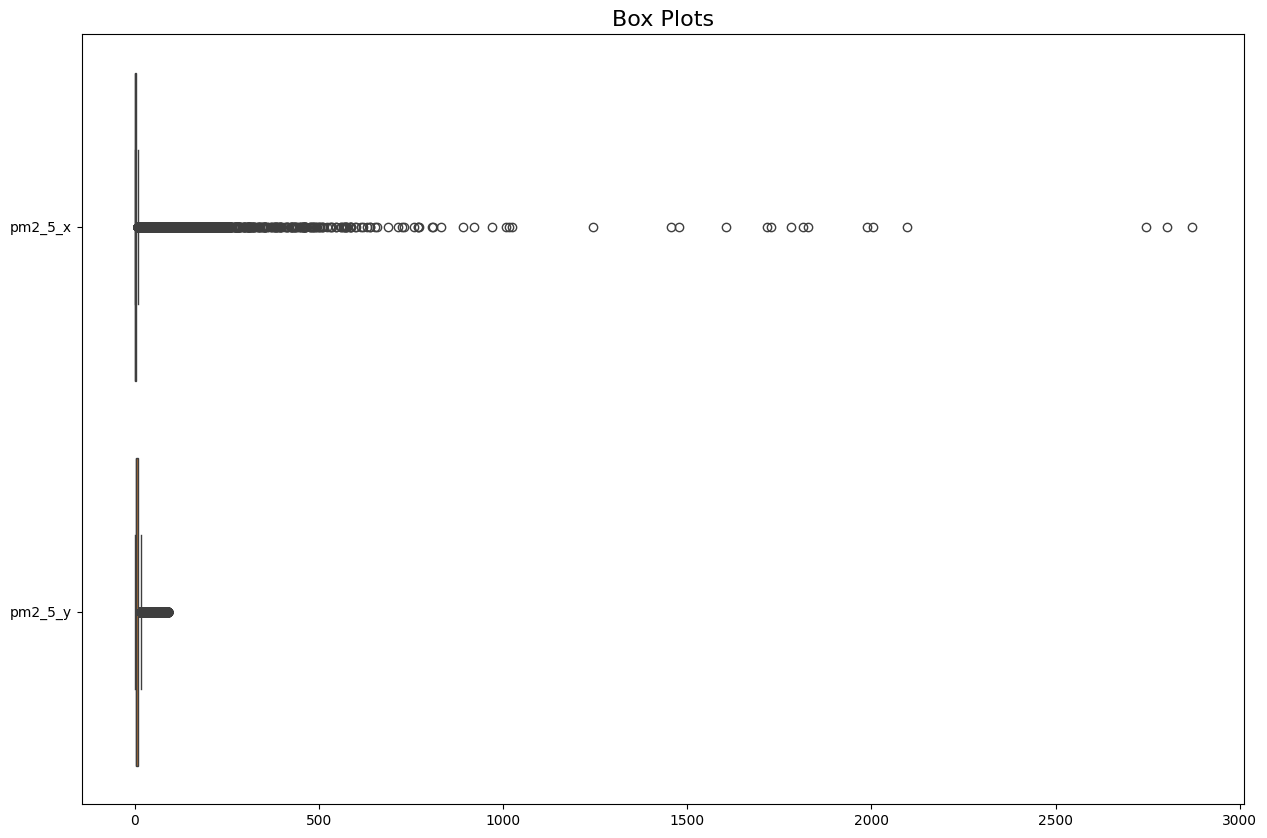

In [97]:
# ----------------------------------------------------------------- 
# FOCUSING ON POINT C.
# ----------------------------------------------------------------- 

# C. pm2_5 definitely has an outlier, this is because a max of 2245 would hurt or kill a person instantly.
## Boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_choose = ["pm2_5_x","pm2_5_y"]
poll_box_pm2_5 = merged_inhale_openweather_dropped[columns_to_choose].copy()

plt.figure(figsize=(15, 10))
sns.boxplot(data=poll_box_pm2_5, orient='h')
plt.title('Box Plots', fontsize=16)
plt.show()

## OUTPUT --> Based on the below plot, we can straight away see how pm2_5_x (which is air pollution coming from individual sensor_data)
## is more sensible to outliers. Values higher than 1000 need to be excluded since outliers.

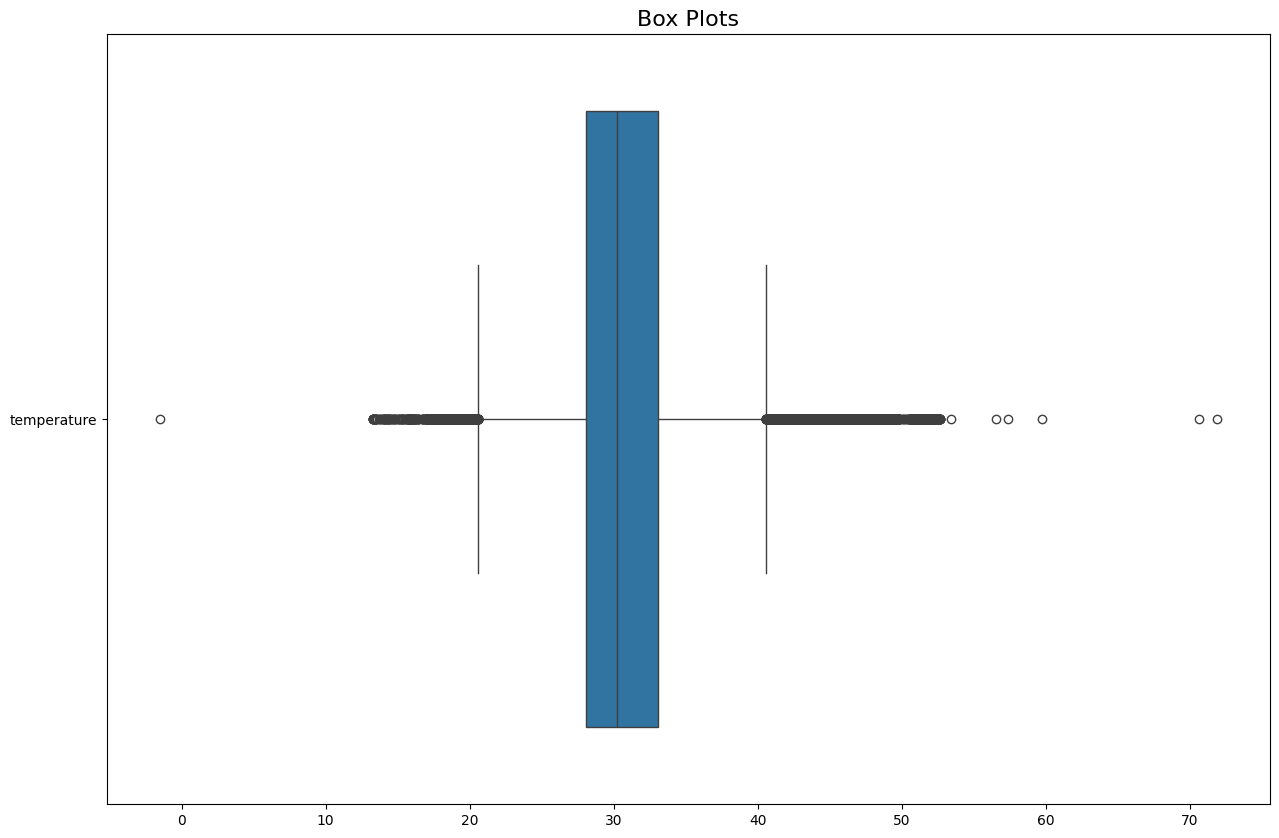

In [98]:
# ----------------------------------------------------------------- 
# FOCUSING ON POINT D.
# ----------------------------------------------------------------- 

# D. Temperature as well - since there is a massive spike
## Boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_choose = ["temperature"]
poll_box_temperature = merged_inhale_openweather_dropped[columns_to_choose].copy()

plt.figure(figsize=(15, 10))
sns.boxplot(data=poll_box_temperature, orient='h')
plt.title('Box Plots', fontsize=16)
plt.show()

## OUTPUT --> Because most of the sensors reading are in spring summer I was expecting values between 20 and 30 degrees.
## After checking the 56 degrees max value 

## After finding out the temperature of 56 degree was in March - I can confidently say it was an outlier!

merged_inhale_openweather_hot = merged_inhale_openweather_dropped[merged_inhale_openweather_dropped["temperature"] == 56.630000]

## OUTPUT --> Remove 56 degrees value!

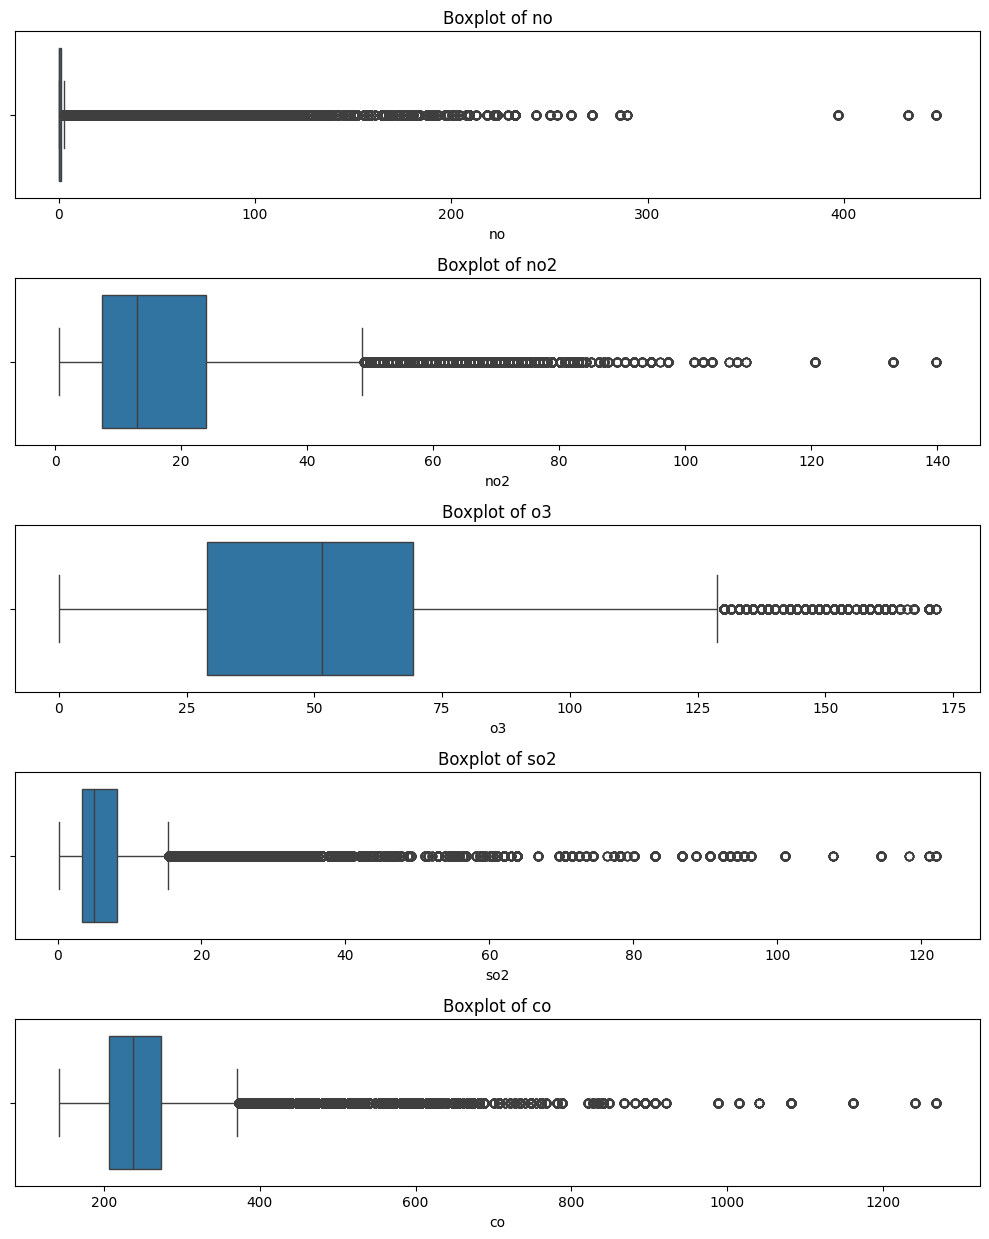

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------------- 
# FOCUSING ON POINT E.
# ----------------------------------------------------------------- 

columns_to_choose = ["no", "no2", "o3", "so2", "co"]
poll_box_poll_overall = merged_inhale_openweather_dropped[columns_to_choose].copy()

n = len(columns_to_choose)
fig, axes = plt.subplots(n, 1, figsize=(10, 2.5 * n))  # 1 column, n rows

for i, col in enumerate(columns_to_choose):
    sns.boxplot(x=poll_box_poll_overall[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


## OUTPUT --> For now I am removing only clear outliers!
## no < 250
## no2 < 130
## o3 < 135
## so2 < 120 
## co < 800

In [100]:
## Removing all outliers based on above findings
## A.B. ACTIVITY LEVELS: Only a few values above 1.25 so I will drop them!
## C. PM2_5 > 1000, drop
## D. TEMPERATURE: Remove 56 degress value!
## E. POLLUTION MEASURES FROM OPENWEATHER: But check if they are still there!

print(merged_inhale_openweather_dropped.columns)
print(f"Before outliers removal:{len(merged_inhale_openweather_dropped)}")

merged_inhale_openweather_act_no = merged_inhale_openweather_dropped[merged_inhale_openweather_dropped["act_level"] < 1.25]

merged_inhale_openweather_pm2_5_no = merged_inhale_openweather_act_no[merged_inhale_openweather_act_no["pm2_5_x"] < 1000]

merged_inhale_openweather_temp_no = merged_inhale_openweather_pm2_5_no[merged_inhale_openweather_pm2_5_no["temperature"] < merged_inhale_openweather_pm2_5_no["temperature"].max()]

merged_inhale_openweather_poll_tot = merged_inhale_openweather_temp_no[(merged_inhale_openweather_temp_no["no"] < 250) |
                                                                        (merged_inhale_openweather_temp_no["no2"] < 130) |
                                                                         (merged_inhale_openweather_temp_no["o3"] < 135) |
                                                                          (merged_inhale_openweather_temp_no["so2"] < 120) |
                                                                           (merged_inhale_openweather_temp_no["co"] < 800)]
        
## OUTPUT --> For now I am removing only clear outliers!
## no < 250
## no2 < 130
## o3 < 135
## so2 < 120 
## co < 800
print(f"After outliers removal:{len(merged_inhale_openweather_poll_tot)}")

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude_x', 'longitude_x',
       'season_y', 'pm2_5_x', 'temperature', 'humidity', 'time_diff',
       'new_segment', 'segment_id', 'hour', 'dow', 'day_of_year', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'yearly_sin', 'yearly_cos',
       'timestamp_hour', 'lat_round', 'lon_round', 'pm2_5_y', 'pm10', 'no',
       'no2', 'o3', 'so2', 'co'],
      dtype='object')
Before outliers removal:533012
After outliers removal:526502


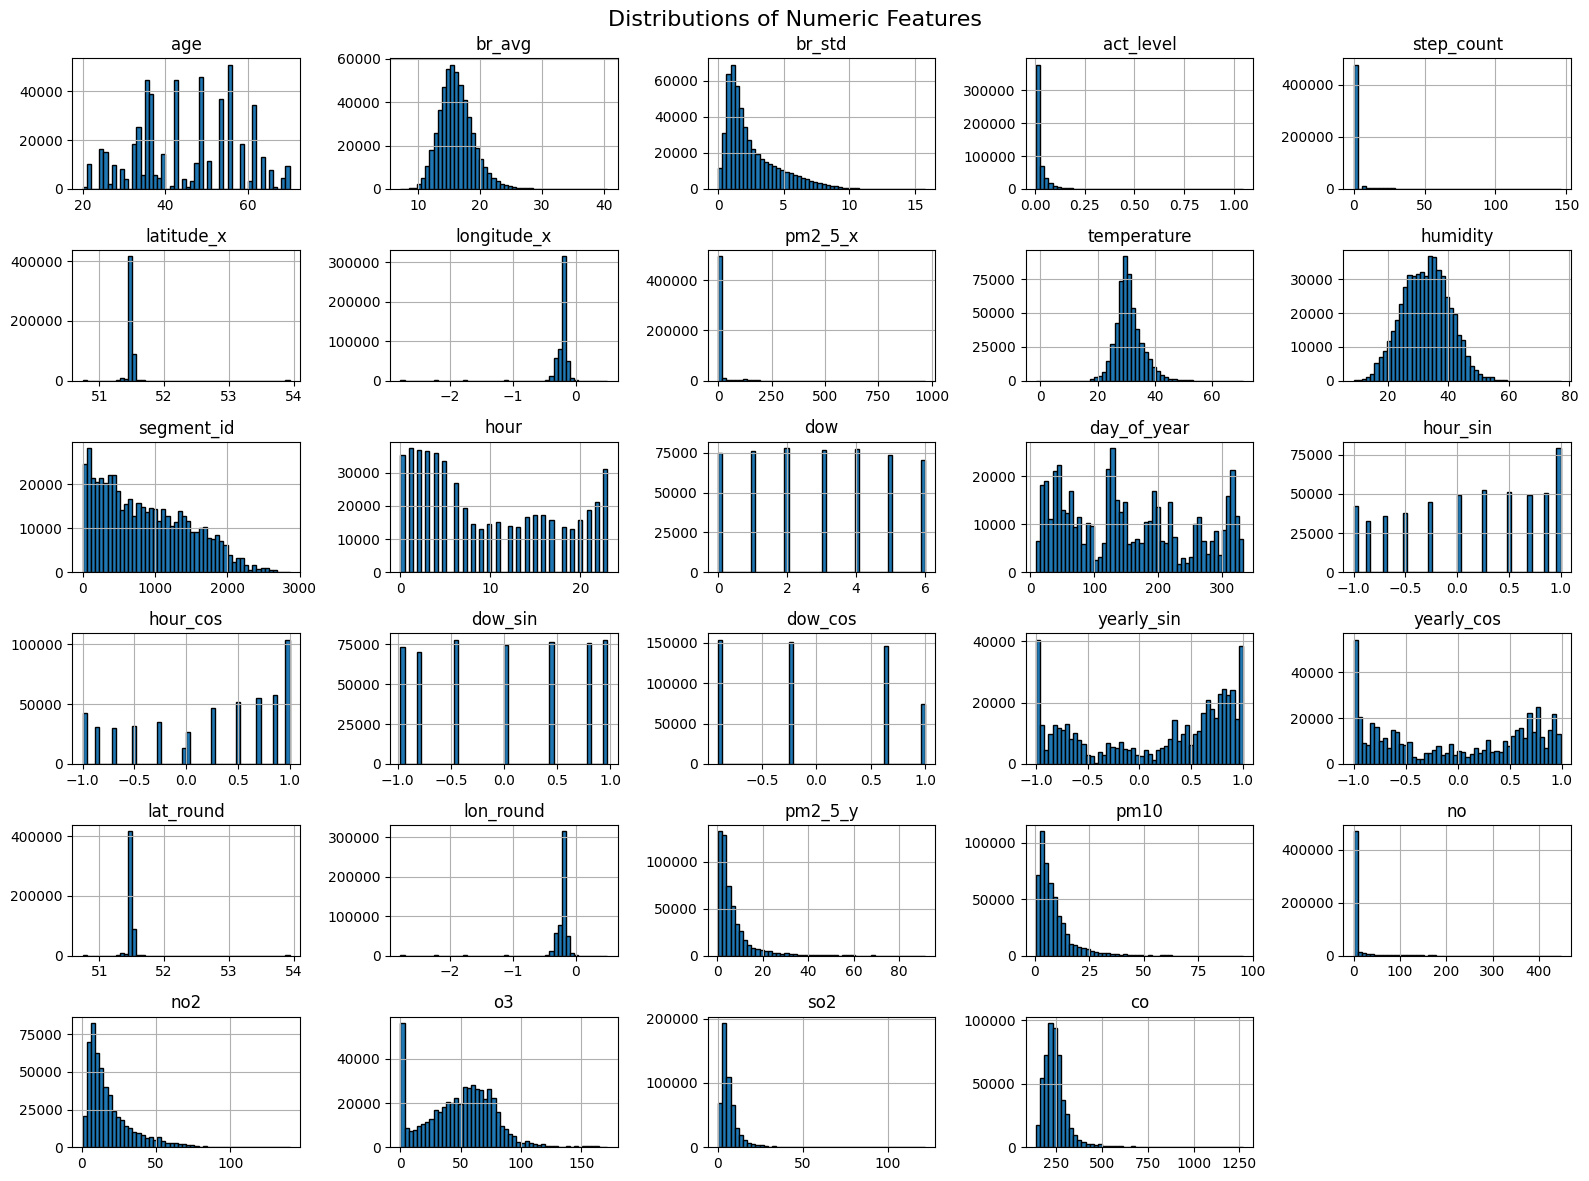

In [101]:
## When Looking at the distribution of variables we can see that:

import matplotlib.pyplot as plt
# Select only numeric columns
numeric_cols = merged_inhale_openweather_poll_tot.select_dtypes(include='number')
# Plot
numeric_cols.hist(bins=50, figsize=(16, 12), edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

## You can see straight away how:
# - br_avg --> Need log skew
# - br_std --> Need log skew
# - act_level --> Need log skew
# - step_count --> need log skew
# - temperature --> normalisation needed
# - humidity --> normalisation needed
# - pm_2_5_y, pm10, no, no2, o3, so2, co need log skew. 

In [102]:
## DECISIONS ABOUT WHICH PATIENT TO INCLUDE/EXCLUDE

In [103]:
## Checking timestamp - Which patient_id should I consider and which should I exclude?

In [104]:
## Learning point:

## Seems like there is not enough data available here:

## NUmber of rows per patient:
# INH131	9970	16.960002	3.130395	7.811052	40.539921	0
# INH138	9746	15.807289	2.984870	8.501855	37.599060	0
# INH014	9131	15.812821	3.032257	7.912819	40.167995	0
# INH121	8588	16.614206	2.675530	7.812432	35.356556	0
# INH011	6784	17.553251	2.918031	8.658721	35.497250	0
# INH018	6580	16.528699	2.893721	8.419410	34.104557	0
# INH130	5137	17.778346	2.824248	8.706172	34.690540	0
# INH027	4926	17.645728	3.140574	8.523079	40.167995	0
# INH008	4339	17.394300	2.955554	8.420137	39.884861	0
# INH028	3260	15.757704	3.698346	7.463918	41.413460	0
# INH132	2457	16.531736	3.289066	8.539427	37.697220	0
# INH119	982	16.197776	2.784998	9.889407	30.739164	0

In [105]:
patient_checking_data = merged_inhale_openweather_poll_tot.copy()

In [106]:
patient_checking_data

patient_id  age     sex           timestamp season_x     br_avg  \
0          INH001   65  Female 2021-02-23 21:24:00   Winter  19.542938   
1          INH001   65  Female 2021-02-23 21:25:00   Winter  20.762518   
2          INH001   65  Female 2021-02-23 21:26:00   Winter  19.246227   
3          INH001   65  Female 2021-02-23 21:27:00   Winter  17.215359   
4          INH001   65  Female 2021-02-23 21:28:00   Winter  17.300472   
...           ...  ...     ...                 ...      ...        ...   
533007     INH139   47  Female 2024-01-30 23:55:00   Winter  14.888110   
533008     INH139   47  Female 2024-01-30 23:56:00   Winter  14.972208   
533009     INH139   47  Female 2024-01-30 23:57:00   Winter  15.359121   
533010     INH139   47  Female 2024-01-30 23:58:00   Winter  15.506245   
533011     INH139   47  Female 2024-01-30 23:59:00   Winter  15.643299   

          br_std  act_level  step_count                activity  ...  \
0       6.395616   0.116685           0  Sitting bent backwards  ...   
1       2.593489   0.066786           0      Lying down on back  ...   
2       2.828573   0.012011           0      Lying down on back  ...   
3       4.588334   0.016393           0      Lying down on back  ...   
4       2.968072   0.071856           9      Lying down on back  ...   
...          ...        ...         ...                     ...  ...   
533007  0.611812   0.013874           0  Lying down to the left  ...   
533008  0.887404   0.014606           0  Lying down to the left  ...   
533009  1.316184   0.014437           0  Lying down to the left  ...   
533010  1.020111   0.014413           0  Lying down to the left  ...   
533011  0.881049   0.013871           0  Lying down to the left  ...   

            timestamp_hour  lat_round lon_round  pm2_5_y   pm10      no  \
0      2021-02-23 21:00:00     51.496    -0.198     4.68   6.26    0.00   
1      2021-02-23 21:00:00     51.496    -0.198     4.68   6.26    0.00   
2      2021-02-23 21:00:00     51.496    -0.198     4.68   6.26    0.00   
3      2021-02-23 21:00:00     51.496    -0.198     4.68   6.26    0.00   
4      2021-02-23 21:00:00     51.496    -0.198     4.68   6.26    0.00   
...                    ...        ...       ...      ...    ...     ...   
533007 2024-01-30 23:00:00     51.472    -0.209    34.10  37.16  139.47   
533008 2024-01-30 23:00:00     51.472    -0.209    34.10  37.16  139.47   
533009 2024-01-30 23:00:00     51.472    -0.209    34.10  37.16  139.47   
533010 2024-01-30 23:00:00     51.472    -0.209    34.10  37.16  139.47   
533011 2024-01-30 23:00:00     51.472    -0.209    34.10  37.16  139.47   

          no2     o3    so2      co  
0        7.80  77.96   3.73  223.64  
1        7.80  77.96   3.73  223.64  
2        7.80  77.96   3.73  223.64  
3        7.80  77.96   3.73  223.64  
4        7.80  77.96   3.73  223.64  
...       ...    ...    ...     ...  
533007  74.03   0.00  56.74  674.25  
533008  74.03   0.00  56.74  674.25  
533009  74.03   0.00  56.74  674.25  
533010  74.03   0.00  56.74  674.25  
533011  74.03   0.00  56.74  674.25  

[526502 rows x 38 columns]

In [107]:
## Checking timestamp:
patient_stats = (
    patient_checking_data
    .groupby("patient_id")
    .agg(
        num_rows=('br_avg', 'count'),
        br_avg_mean=('br_avg', 'mean'),
        br_avg_std=('br_avg', 'std'),
        br_avg_min=('br_avg', 'min'),
        br_avg_max=('br_avg', 'max'),
        missing_rows=('br_avg', lambda x: x.isna().sum())
    )
    .sort_values("num_rows", ascending=False)
)

patient_stats


num_rows  br_avg_mean  br_avg_std  br_avg_min  br_avg_max  \
patient_id                                                              
INH117         23824    15.831640    2.505235    8.253881   29.703077   
INH101         21229    15.545773    2.863578    7.938798   37.272114   
INH102         20763    18.636572    2.244225    8.307934   34.364632   
INH108         20101    16.197935    2.244021    7.477376   33.040913   
INH106         19843    16.223220    2.207621    8.780467   33.182255   
INH100         19201    15.723653    2.168578    7.605968   32.335209   
INH112         18472    14.058599    2.564154    7.901015   37.272114   
INH120         18331    16.152872    2.120610    7.523340   33.261585   
INH109         16570    17.181947    2.413635    7.472114   35.836185   
INH004         16307    15.510589    2.854974    7.198472   36.732929   
INH110         15853    18.826980    3.035099    7.650020   33.883739   
INH128         15273    14.365620    2.647305    8.225983   40.539921   
INH113         15270    16.439903    2.085129    7.933395   34.122200   
INH114         15259    15.298875    2.519349    7.887553   34.776939   
INH025         15103    15.492870    1.920749    8.729084   31.842470   
INH103         15072    15.735667    2.011328    8.317046   34.000912   
INH107         14335    18.325234    2.470171    8.150501   34.440731   
INH007         12996    18.203844    2.254981    9.103413   38.159595   
INH135         12801    15.676519    1.865443    8.608045   30.650833   
INH111         12738    17.075677    2.580772    8.236631   32.948364   
INH003         11991    14.104744    2.204554    8.922445   35.914196   
INH024         11275    17.240710    2.560079    9.066099   38.947041   
INH017         10590    16.776383    2.206235    8.009246   35.497250   
INH139         10465    15.785732    2.084365    8.772321   31.877480   
INH006         10043    15.958043    3.009099    8.744349   33.195576   
INH010          9876    16.007125    2.228238    8.206365   36.086304   
INH002          9871    14.523577    2.246381    8.369036   35.834789   
INH012          9471    16.239739    2.114008    8.221225   36.061382   
INH015          8371    15.911466    2.505150    7.373703   32.565849   
INH005          8245    19.798284    3.024798    9.530508   38.250820   
INH013          7939    16.815956    2.226883    7.997768   30.028049   
INH123          7811    15.899561    2.297757    8.571541   40.443413   
INH001          7762    15.610923    2.279251    8.520204   37.481617   
INH115          6980    15.406014    2.186673    7.332908   34.452515   
INH023          5711    16.463181    2.498761    8.053607   33.515453   
INH124          5684    15.884290    2.256270    9.704902   34.177608   
INH129          5457    13.781672    3.213923    7.500161   32.335274   
INH014          4642    15.253354    2.403361    8.295564   40.167995   
INH138          4493    15.070720    2.591777    8.501855   35.497250   
INH127          4271    16.374736    2.200591    8.746360   33.261585   
INH020          4269    14.367878    2.257367    8.459979   30.027536   
INH131          3933    16.208435    1.941428    8.668001   33.194386   
INH121          3492    16.514083    2.336992    7.946888   33.264896   
INH011          3437    16.746087    2.156152    9.435978   29.817692   
INH018          3381    16.207143    2.654979    8.419410   32.130100   
INH027          2036    18.029620    2.882537    8.808017   31.799662   
INH130          1916    17.598945    2.409725    8.706172   32.361874   
INH008          1358    17.513848    2.347104    8.816859   27.191677   
INH132           916    15.619890    2.174661    8.539427   29.860325   
INH028           866    15.154243    3.074099    8.750959   38.252975   
INH119           609    15.585446    2.339590   11.541301   23.362305   

            missing_rows  
patient_id                
INH117                 0  
INH101                 0  
INH102                 0  
INH108 

## Data Preprocessing Pipeline:

In [109]:
## Here dropping timestamp - it will be represented with sin cosin

final_merged_io = merged_inhale_openweather_poll_tot.copy()
final_merged_io.drop(columns=[
    "timestamp", "timestamp_hour"], inplace=True)

print(len(final_merged_io.columns))
final_merged_io.dtypes
print(final_merged_io.columns)

36
Index(['patient_id', 'age', 'sex', 'season_x', 'br_avg', 'br_std', 'act_level',
       'step_count', 'activity', 'latitude_x', 'longitude_x', 'season_y',
       'pm2_5_x', 'temperature', 'humidity', 'time_diff', 'new_segment',
       'segment_id', 'hour', 'dow', 'day_of_year', 'hour_sin', 'hour_cos',
       'dow_sin', 'dow_cos', 'yearly_sin', 'yearly_cos', 'lat_round',
       'lon_round', 'pm2_5_y', 'pm10', 'no', 'no2', 'o3', 'so2', 'co'],
      dtype='object')


In [110]:
# Filter out patients with high missingness
to_exclude = [
    "INH130", "INH020", "INH008", "INH129", "INH124", 
    "INH005", "INH126", "INH019", "INH026", "INH132", 
    "INH016", "INH136"
]
merged_no_leak = merged_inhale_openweather_poll_tot[
    ~merged_inhale_openweather_poll_tot["patient_id"].isin(to_exclude)
]

# # Split patients into train and test
# unique_pids = merged_no_leak['patient_id'].unique()
# np.random.shuffle(unique_pids)
# split_idx = int(0.7 * len(unique_pids))

# train_pids = unique_pids[:split_idx]
# test_pids = unique_pids[split_idx:]

# train_df = merged_no_leak[merged_no_leak['patient_id'].isin(train_pids)].copy()
# test_df = merged_no_leak[merged_no_leak['patient_id'].isin(test_pids)].copy()

In [117]:
merged_no_leak.columns

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude_x', 'longitude_x',
       'season_y', 'pm2_5_x', 'temperature', 'humidity', 'time_diff',
       'new_segment', 'segment_id', 'hour', 'dow', 'day_of_year', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'yearly_sin', 'yearly_cos',
       'timestamp_hour', 'lat_round', 'lon_round', 'pm2_5_y', 'pm10', 'no',
       'no2', 'o3', 'so2', 'co'],
      dtype='object')

In [ ]:
cols = ["age", "br_avg", "br_std" , 'act_level', 'step_count', 'latitude_x', 'longitude_x', 'pm2_5_x', 'humidity', 'pm10', 'no',
       'o3', 'so2', 'co']

corr_dataframe = merged_no_leak[cols]

corr = corr_dataframe.corr()

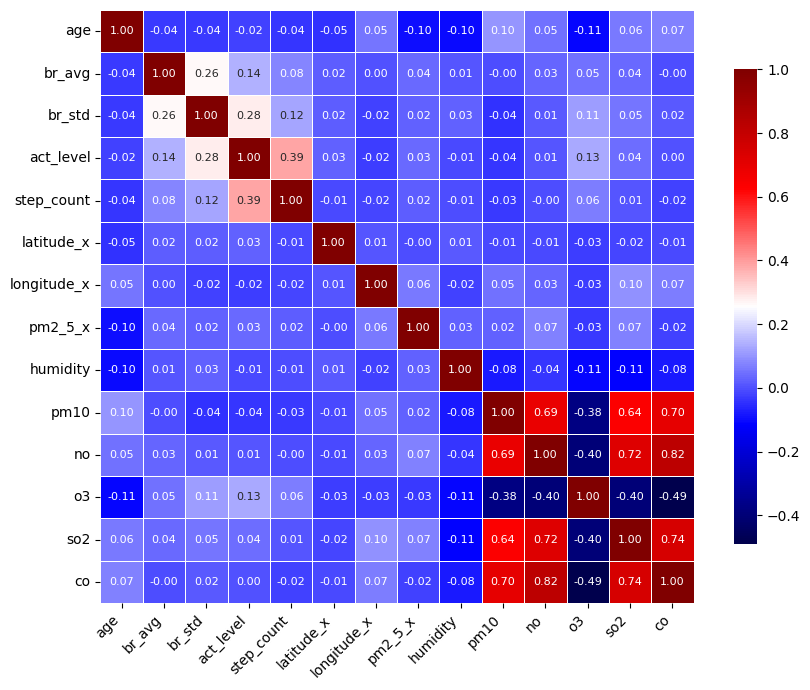

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))    # or whatever aspect ratio works for you
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink":0.8},
    annot_kws={"fontsize":8}
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
train_df.to_csv("train_data_not_normalised.csv")
test_df.to_csv("test_data_not_normalised.csv")

# APPENDIX

## RESPIRATORY DATA

In [ ]:
# respiratory_data = read_file(file=files.iloc[9])
# respiratory_data.head(5)

In [ ]:
# ## Let's check which columns are available
# respiratory_data.dtypes
# ## There are 57 different patient_id
# print(len(resp_data["patient_id"].unique()), resp_data.dtypes)

In [ ]:
# respiratory_data = respiratory_data.drop(columns = ["Unnamed: 0"])

In [ ]:
# import numpy as np
# import pandas as pd

# # Classifying each patient as 'ashmatic' or 'healthy' based on ID pattern
# respiratory_data["health"] = np.where(
#     respiratory_data["patient_id"].str[3] == "0", 
#     "ashmatic", 
#     "healthy"
# )

# # Ensuring 'timestamp' column is in datetime format
# respiratory_data['timestamp'] = pd.to_datetime(respiratory_data['timestamp'])

# # Extract time-based features
# respiratory_data['is_weekend'] = respiratory_data['timestamp'].dt.dayofweek.isin([5, 6])
# respiratory_data['month'] = respiratory_data['timestamp'].dt.month
# respiratory_data['week_of_year'] = respiratory_data['timestamp'].dt.isocalendar().week

# # Cyclical encoding for hour of day and day of week this is because if not the model will see 23pm and 1am as far away 
# respiratory_data['hour_sin'] = np.sin(2 * np.pi * respiratory_data['timestamp'].dt.hour / 24)
# respiratory_data['hour_cos'] = np.cos(2 * np.pi * respiratory_data['timestamp'].dt.hour / 24)

# # Cyclical encoding for day of week
# respiratory_data['dow_sin'] = np.sin(2 * np.pi * respiratory_data['timestamp'].dt.dayofweek / 7)
# respiratory_data['dow_cos'] = np.cos(2 * np.pi * respiratory_data['timestamp'].dt.dayofweek / 7)

# respiratory_data = respiratory_data.drop(columns=["timestamp"])

# # Now your respiratory_data has clean, ML-friendly time embeddings
# respiratory_data.head()

In [ ]:
# respiratory_data["sex"].value_counts()

In [ ]:
# ## I need to understand the timeline per id
# timeline_per_id = (
#     resp_data
#     .groupby("patient_id")["timestamp"]
#     .agg(["min", "max"])
#     .reset_index()
# ).copy()
# print(timeline_per_id)

## Timestamp
## Every id has different timestamp - how is this going to impact my model?


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Filter data for specific patient
# patient_id = "INH029"
# measure = "br_avg"
# resp_data_patient = resp_data[resp_data["patient_id"] == patient_id].copy()

# # # Ensure timestamp is in datetime format (if not already)
# resp_data_patient['timestamp'] = pd.to_datetime(resp_data_patient['timestamp'])
# # pd.to_datetime(resp_data001['timestamp'])

# # Set timestamp as index (for clean plotting)
# resp_data_patient.set_index('timestamp', inplace=True)

# # Create the plot with proper timestamp handling
# plt.figure(figsize=(15, 6))
# resp_data_patient[measure].plot(title=f'{measure}  Over Time for Patient {patient_id}')

# # Customize x-axis to show timestamps clearly
# plt.xlabel('Timestamp')  # Explicit x-label
# plt.ylabel(measure)
# plt.grid(True)

# # Improve x-axis tick formatting for better readability
# plt.gcf().autofmt_xdate()  # Auto-format dates to prevent overlap

# plt.tight_layout()
# plt.show()

# Participants
## a. How many participants do we have?
## b. Males vs Females?
## c. What about their age?
## d. Wich activity do they do?
## e. Which features are more or less correlated?

In [ ]:
# ## a. How many participants do we have?
# print(len(resp_data["patient_id"].unique()))

# ## b. I am dropping duplicates because it's a time-series dataset
# ## There are more females than males - is this going to imbalance the dataset - does it matter?
# gender_counts = resp_data.drop_duplicates(subset="patient_id")["sex"].value_counts()
# print(gender_counts)

# ## c. In relation to their age - there are slightly more individuals between the age of 35 and 50 
# ## then other age brackets
# import matplotlib.pyplot as plt

# # Get unique ages per patient_id
# unique_ages = resp_data.drop_duplicates(subset="patient_id")["age"]

# # Plot histogram
# plt.figure(figsize=(10, 6))
# plt.hist(unique_ages, bins=10, edgecolor='black', color='skyblue')
# plt.title("Age Distribution of Participants (One per ID)")
# plt.xlabel("Age")
# plt.ylabel("Count")
# plt.grid(axis='y', alpha=0.5)
# plt.show()

# ## d. What are the activity types?
# activity_counts = resp_data.drop_duplicates(subset="patient_id")["activity"].value_counts()
# print(activity_counts)

In [ ]:
# ## e. Which features are more or less correlated?
# ## It seems like that only activity levels are strongly correlated
# # Correct way to drop multiple columns
# import pandas as pd

# # Convert categorical columns to numerical (one-hot encoding)
# resp_data_encoded = pd.get_dummies(
#     resp_data,
#     columns=["sex", "activity", "season"],  # Replace with your column names
#     drop_first=True  # Avoid multicollinearity (e.g., Female=0 → Male=1)
# )

# # Now drop other non-numeric columns (e.g., patient_id, timestamp)
# resp_data_corr = resp_data_encoded.drop(columns=["Unnamed: 0", "patient_id", "timestamp"])

# # Compute correlation
# corr = resp_data_corr.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
# plt.title("Feature Correlation Matrix")
# plt.show()

# POLLUTION DATA
## a. How many participants do we have? For how long?
## b. Where is the data located by participant
## c. Which features are more or less correlated?
## d. Generic trend of pollution vs location  
## e. Pollution and season
## f  Pollution vs time of day
## g. Pollution vs temperature and humifity

In [ ]:
# pollution_data = read_file(file=files.iloc[8])
# pollution_data.head(5)

In [ ]:
# print(pollution_data["season"].value_counts())
# print(pollution_data["patient_id"].unique().copy())
# ## a. How many participants do we have?
# print(len(pollution_data["patient_id"].unique()))

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# poll_box = pollution_data.drop(columns=["Unnamed: 0"])
# poll_box = poll_box[poll_box["patient_id"] == "INH002"]
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=poll_box, orient='h')
# plt.title('Box Plots', fontsize=16)
# plt.show()

In [ ]:
# ## Testing
# bad_reading = pollution_data.groupby('patient_id')['pm2_5'].agg(['max','count']).sort_values('max', ascending=False)
# bad_reading


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm

# pollution_data = pollution_data[pollution_data["pm2_5"] < 501]
# # 1) Define your PM₂.₅ bins at real‐world breakpoints
# bins = [0,10, 25, 50, 100, 200, 500]

# # 2) Create a norm that maps each bin to a distinct color
# norm = BoundaryNorm(bins, ncolors=256, clip=True)

# # 3) Clip your data to the top end
# x = pollution_data.longitude
# y = pollution_data.latitude
# c = pollution_data.pm2_5.clip(upper=500)

# # 4) Plot with 'turbo' (or swap to 'cividis', 'viridis', etc.)
# plt.figure(figsize=(10,8))
# sc = plt.scatter(
#     x, y,
#     c=c,
#     cmap='turbo',
#     norm=norm,
#     s=25,          # slightly bigger points
#     edgecolors='k',# thin black border for contrast
#     linewidths=0.2,
#     alpha=0.9
# )

# # 5) Colorbar ticks at exactly your bin edges
# cb = plt.colorbar(sc, boundaries=bins, ticks=bins)
# cb.set_label('PM₂.₅ (µg/m³), binned')

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('PM₂.₅ by Latitude-Longitude London spotlight')
# plt.grid(True, linestyle='--', linewidth=0.5)
# plt.savefig("London_pollution.jpeg") 
# plt.show()

In [ ]:
# ## PM2.5 by time of day?
# import pandas as pd
# import matplotlib.pyplot as plt

# ## Time between 6pm to 8pm is the one with the highest exposure to air pollution!

# # 1) Make sure your timestamp is a proper datetime
# pollution_data['timestamp'] = pd.to_datetime(pollution_data['timestamp'])

# # 2) Extract hour of day
# pollution_data['hour'] = pollution_data['timestamp'].dt.hour

# # 3) Compute the mean (and maybe the ±1 σ envelope) by hour
# hourly = pollution_data.groupby('hour')['pm2_5'].agg(['mean','std','count']).reset_index()

# # 4) Plot
# plt.figure(figsize=(10,5))
# plt.plot(hourly['hour'], hourly['mean'], marker='o', lw=2, label='Mean PM₂.₅')
# # plt.fill_between(hourly['hour'],
# #                  hourly['mean'] - hourly['std'],
# #                  hourly['mean'] + hourly['std'],
# #                  color='C0', alpha=0.2,
# #                  label='±1 σ')
# plt.xticks(range(0,24))
# plt.xlabel('Hour of Day')
# plt.ylabel('PM₂.₅ (µg/m³)')
# plt.title('Average Daily Cycle of PM₂.₅')
# plt.grid(True, ls='--', alpha=0.5)
# plt.legend()
# plt.savefig("PM₂.₅ average daily cycle.jpeg") 
# plt.show()


In [ ]:
# ## How about Pm2.5 by season

# ## Higher in the winter as expected 

# # compute count, mean, std, min, max by season
# print(pollution_data.groupby("season")["pm2_5"]
#       .describe()[["count","mean","std","min","max"]])


In [ ]:
# ## In term of feature correlation
# ## c. not much to say about it but maybe a light correlation between temperature and humidity?
# import pandas as pd

# # # Convert categorical columns to numerical (one-hot encoding)
# poll_data_encoded = pd.get_dummies(
#     pollution_data,
#     columns=["season"]
# )
# # Now drop other non-numeric columns (e.g., patient_id, timestamp)

# pollution_data.head()

# poll_data_corr = poll_data_encoded.drop(columns=["Unnamed: 0", "patient_id", "timestamp"])

# # Compute correlation
# corr = poll_data_corr.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Feature Correlation Matrix")
# plt.show() 


# Data Prepocessing:
## a. Outliers removal 
## b. Dropping nans 
## c. Standardisation but wait and do altogether

# RESPIRATORY DATA

In [ ]:
# ## Checking whether there are any outliers!
# ## The problem with this approach is that in healthcare applications outliers are very important to maintain
# ## This is because they normally tell a story about some peculiarity
# ## The only ones that I want to remove are due to calibration
# # Maybe something on step_count?

# import seaborn as sns
# box_resp_data = resp_data.drop(columns=["Unnamed: 0"]).copy()
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=box_resp_data, orient='h')
# plt.title('Box Plots', fontsize=16)
# plt.show()

In [ ]:
# ## Let's checl how many nans
# print(resp_data.isnull().sum() / len(resp_data) * 100)

## POLLUTION DATA

In [ ]:
# ## From the box plot below - there are some obious outliers in pm2.5

# import seaborn as sns
# box_poll_data = pollution_data.drop(columns=["Unnamed: 0"]).copy()
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=box_poll_data, orient='h')
# plt.title('Box Plots', fontsize=16)
# plt.show()

In [ ]:
# ## Let's checl how many nans
# print(pollution_data.isnull().sum() / len(pollution_data) * 100)

In [ ]:
# ## Let's try a feature correlation!
# # Convert categorical columns to numerical (one-hot encoding)
# merged_data_encoded = pd.get_dummies(
#     merged_data,
#     columns=["season", "activity", "sex"],  # Replace with your column names
#     drop_first=True  
# )
# # Now drop other non-numeric columns (e.g., patient_id, timestamp)
# merged_data_corr = merged_data_encoded.drop(columns=["Unnamed: 0_x", "patient_id", "timestamp", "Unnamed: 0_y"])

# # Compute correlation
# corr = merged_data_corr.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
# plt.title("Feature Correlation Matrix")
# plt.show() 


APPENDIX

<h2 style="color:#0074D9;">4. List the fields (clinical variables) of a study.</h2>

In [ ]:
# from pydmp import list_fields
# fields = list_fields(study_id=study_id, format='df')
# fields

<h2 style="color:#0074D9;">5. Fetch the data of fields of a study.</h2>

In [ ]:
# from pydmp import list_data
# data = list_data(study_id=study_id, field_ids=['File_Study_File'], format='df')
# data

<h2 style="color:#0074D9;">6. Run your own analysis.</h2>

In [ ]:
## Focus resp_data.csv